In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
tobs_june = session.query(Measurement.date, Measurement.tobs).\
                filter(extract('month', Measurement.date) == 6).all()

In [5]:
# 2. Convert the June temperatures to a list.
list_tobs_june = list(np.ravel(tobs_june))

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(tobs_june, columns = ['date', 'tobs'])
june_temp_df.set_index(june_temp_df['date'], inplace = True)
june_temp_df.drop('date', axis=1, inplace=True)

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


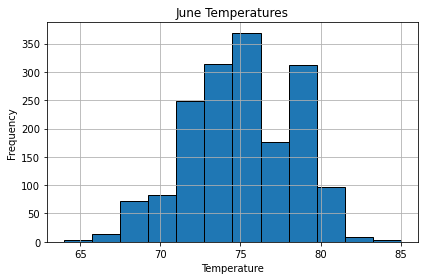

In [8]:
june_temp_df.plot.hist(bins=12, grid = True, edgecolor = 'black', legend = None)
plt.xlabel('Temperature')
plt.title('June Temperatures')
plt.tight_layout()
plt.savefig('june_temp.jpg')

In [15]:
# Determine summary statistics for precipitation
prcp_june = session.query(Measurement.date, Measurement.prcp).\
                filter(extract('month', Measurement.date) == 6).all()
june_prcp_df = pd.DataFrame(prcp_june, columns = ['date', 'precipitation'])
june_prcp_df.set_index(june_prcp_df['date'], inplace = True)
june_prcp_df.drop('date', axis=1, inplace=True)
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


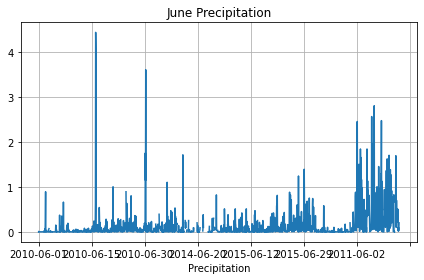

In [25]:
june_prcp_df.plot(grid = True, legend = None)
plt.xlabel('Precipitation')
plt.title('June Precipitation')
plt.tight_layout()
plt.savefig('june_prcp.jpg')

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
tobs_dec = session.query(Measurement.date, Measurement.tobs).\
                filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.
list_tobs_dec = list(np.ravel(tobs_dec))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(tobs_dec, columns = ['date', 'tobs'])
dec_temp_df.set_index(dec_temp_df['date'], inplace = True)
dec_temp_df.drop('date', axis=1, inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


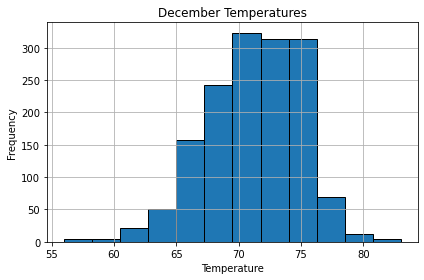

In [13]:
dec_temp_df.plot.hist(bins=12, grid = True, edgecolor = 'black', legend = None)
plt.xlabel('Temperature')
plt.title('December Temperatures')
plt.tight_layout()
plt.savefig('dec_temp.jpg')

In [22]:
# Determine summary statistics for precipitation
prcp_dec = session.query(Measurement.date, Measurement.prcp).\
                filter(extract('month', Measurement.date) == 12).all()
dec_prcp_df = pd.DataFrame(prcp_dec, columns = ['date', 'precipitation'])
dec_prcp_df.set_index(dec_prcp_df['date'], inplace = True)
dec_prcp_df.drop('date', axis=1, inplace=True)
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


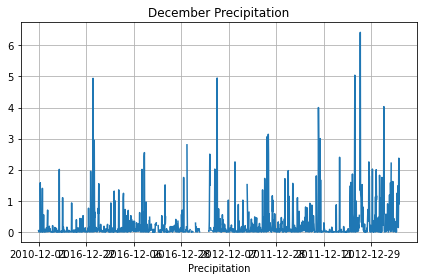

In [26]:
dec_prcp_df.plot(grid = True, legend = None)
plt.xlabel('Precipitation')
plt.title('December Precipitation')
plt.tight_layout()
plt.savefig('dec_prcp.jpg')